# AdaBoost Example

This notebook demonstrates the usage of our custom AdaBoost implementation for classification tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from adaboost import AdaBoostClassifier

## Classification Example

Decision Stump Accuracy: 0.8800
AdaBoost Classifier Accuracy: 0.4800


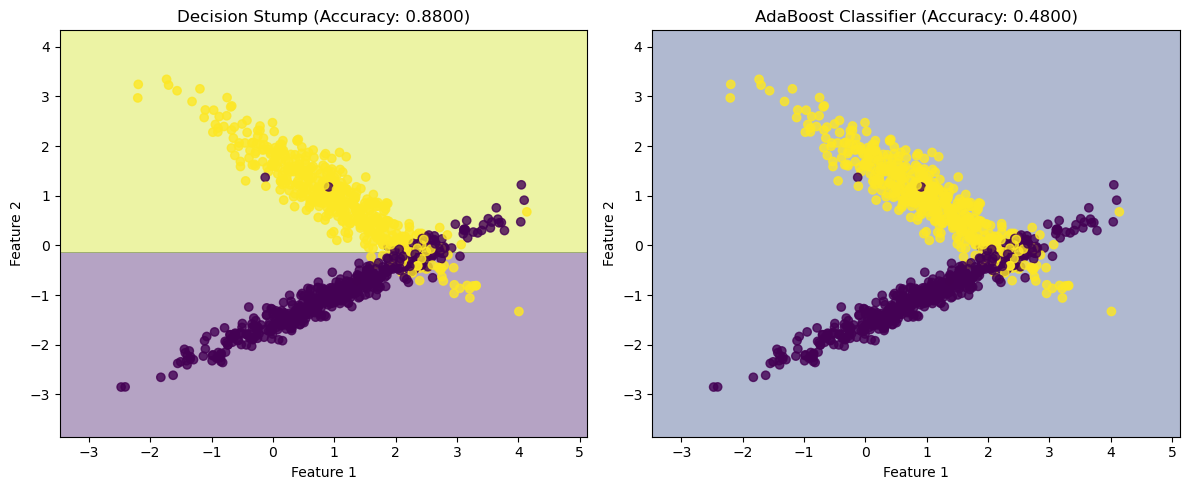

In [2]:
# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a single Decision Tree
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train and evaluate AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

print(f"Decision Stump Accuracy: {dt_accuracy:.4f}")
print(f"AdaBoost Classifier Accuracy: {ada_accuracy:.4f}")

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(dt, X, y, f'Decision Stump (Accuracy: {dt_accuracy:.4f})')
plt.subplot(122)
plot_decision_boundary(ada, X, y, f'AdaBoost Classifier (Accuracy: {ada_accuracy:.4f})')
plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrated the effectiveness of our custom AdaBoost implementation for classification tasks. The visualizations illustrate how AdaBoost can create more complex decision boundaries compared to a single decision stump, often leading to improved classification accuracy.